In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import pandas as pd
import math

## Germany Gov. VS Spain Gov. (EUR) 
### Yield Curve

Данные взяты:

1)Germany:
Excel-file с лекции

2) Spain:
http://www.worldgovernmentbonds.com/country/spain/

In [ ]:
Rec_rate = 0.4

In [ ]:
curve_tenors_Germany = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0,  7.0, 8.0, 9.0, 10.0])
curve_rates_Germany = np.array([-0.55, -0.58, -0.59, -0.54, -0.44, -0.36, -0.28, -0.24, -0.15, 0.01])*1e-2

curve_tenors_Spain = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0,  7.0, 8.0, 9.0, 10.0])
curve_rates_Spain = np.array([-0.521, -0.525, -0.466, -0.428, -0.334, -0.159, -0.091, 0.086, 0.205, 0.266])*1e-2

In [ ]:
Default_Propability = (1 - np.power((1 + curve_rates_Germany),curve_tenors_Germany) / np.power((1 + curve_rates_Spain), curve_tenors_Spain)) / (1 - Rec_rate)
Default_Propability = np.concatenate([[0], Default_Propability])
Survival_Propability = 1 - Default_Propability 
print("Default Propability 1-10 Y :", Default_Propability)
print("Survival Propability 1-10 Y :", Survival_Propability)

Default Propability 1-10 Y : [0.         0.00048586 0.0018425  0.00622127 0.00748612 0.0088441
 0.02003096 0.02194523 0.04293743 0.05239419 0.04206787]
Survival Propability 1-10 Y : [1.         0.99951414 0.9981575  0.99377873 0.99251388 0.9911559
 0.97996904 0.97805477 0.95706257 0.94760581 0.95793213]


##  Линейная интерполяция

In [ ]:
index = np.concatenate([[0], curve_tenors_Germany])
Def_Prob = scipy.interpolate.interp1d(index, Default_Propability, kind = 'linear')
Survival_Prop = scipy.interpolate.interp1d(index, 1 - Default_Propability, kind = 'linear')

In [ ]:
sur_prop_5y = Survival_Prop(np.array([0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]))
Sur_5y = Survival_Prop(np.array([5]))
X = 4 * (1 - Rec_rate)*(1 - Sur_5y) / sur_prop_5y.sum()
print('Величина купона X = ', X)

Величина купона X =  [0.00106589]


In [ ]:
coupon = np.zeros(20)
coupon[:] = X

pay  = np.zeros(20)
pay[:] = 1 - Rec_rate

In [ ]:
buyer = {'Dates coupon (Years)': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5],
         'Propability (%)': sur_prop_5y*100,
         'Coupon - X (%)': coupon*100}
df_buyer = pd.DataFrame(buyer)

## Таблица платежей и вероятностей для покупателя страховки (табл. 1)

In [ ]:
df_buyer

,Dates coupon (Years),Propability (%),Coupon - X (%)
0,0.25,99.987853,0.106589
1,0.50,99.975707,0.106589
2,0.75,99.963560,0.106589
3,1.00,99.951414,0.106589
4,1.25,99.917498,0.106589
5,1.50,99.883582,0.106589
6,1.75,99.849666,0.106589
7,2.00,99.815750,0.106589
8,2.25,99.706281,0.106589
9,2.50,99.596812,0.106589


In [ ]:
sur_prop_5y_tmp = np.concatenate([[1], sur_prop_5y])[:20]
def_prop_5y = sur_prop_5y_tmp - sur_prop_5y
print(def_prop_5y*100)

[0.01214662 0.01214662 0.01214662 0.01214662 0.03391587 0.03391587
 0.03391587 0.03391587 0.10946927 0.10946927 0.10946927 0.10946927
 0.03162121 0.03162121 0.03162121 0.03162121 0.03394961 0.03394961
 0.03394961 0.03394961]


In [ ]:
seller = {'Dates coupon (Years)': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5],
         'Propability (%)': def_prop_5y*100,
         'Pay (1 - R) (%)': (1 - Rec_rate)*100}
df_seller = pd.DataFrame(seller)

## Таблица платежей и вероятностей для продавца страховки (табл. 2)

In [ ]:
df_seller

,Dates coupon (Years),Propability (%),Pay (1 - R) (%)
0,0.25,0.012147,60.0
1,0.50,0.012147,60.0
2,0.75,0.012147,60.0
3,1.00,0.012147,60.0
4,1.25,0.033916,60.0
5,1.50,0.033916,60.0
6,1.75,0.033916,60.0
7,2.00,0.033916,60.0
8,2.25,0.109469,60.0
9,2.50,0.109469,60.0


## Какова вероятность каждого из этих платежей в терминах функции S(t)?

Данные приведе в табл. 1

## Какова вероятность этого события в терминах S(t)?

Данные приведе в табл. 2

##При каком значении купона x матожидание платежей покупателя равно матожиданию платежа продавца?

При X = 0.106589 %

Значение выплаты по такой страховки возможно, т. к. вероятность дефолта облигаций не считается высокой( их доходность - yield curve не так сильно отличается от государственных бондов Германии). Поэтому цена - РАЗУМНА.


## Что должно произойти со стоимостью страховки, если мы будем увеличивать Recovery Rate?



In [ ]:
Rec_rate_i = np.arange(0.1, 1, 1e-2)
X_coupon = []
for i in Rec_rate_i:
  X_coupon += [(4 * (1 - i)*(1 - Sur_5y) / sur_prop_5y.sum()) * 100]

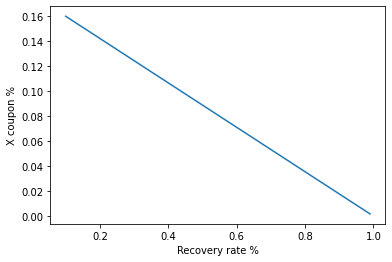

In [ ]:
plt.xlabel("Recovery rate %")
plt.ylabel("X coupon %")
plt.plot(Rec_rate_i, X_coupon)

Как видно из грфаика и из логических соображений при увеличении Recovery Rate - цена страховки уменьшается и при Rec_rate = 1, становится равной 0. Т. к. при таком Recovery Rate эмитент облигации самостоятельно погашает её номинал и продавцу страховки уже не надо ничего возвращать.

## Как цена свопа зависит от доходности рискованной облигации?
##Если доходность рискованной облигации увеличивается, то риск дефолта уменьшается или растёт? 
##Как себя должна вести цена страховки — расти или уменьшаться?

Для проверки сравним платежи страховки от банкротства облигаций, c увеличенной доходностью по каждому теннору(Относительно Испанской). Они имеют более высокую доходность, чем рассмотренные испанские. Прибавим для примера + 10 бп к доходности за каждый период.



In [ ]:
curve_tenors_risk = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0,  7.0, 8.0, 9.0, 10.0])
curve_rates_risk = curve_rates_Spain + 1e-3

In [ ]:
curve_rates_risk

array([-4.21e-03, -4.25e-03, -3.66e-03, -3.28e-03, -2.34e-03, -5.90e-04,
        9.00e-05,  1.86e-03,  3.05e-03,  3.66e-03])

In [ ]:
Default_Propability = (1 - np.power((1 + curve_rates_Germany),curve_tenors_Germany) / np.power((1 + curve_rates_risk), curve_tenors_risk)) / (1 - Rec_rate)
Default_Propability = np.concatenate([[0], Default_Propability])
Survival_Propability = 1 - Default_Propability 
print("Default Propability 1-10 Y :", Default_Propability)
print("Survival Propability 1-10 Y :", Survival_Propability)

Default Propability 1-10 Y : [0.         0.00215909 0.00518468 0.01121589 0.01413467 0.01713602
 0.02989191 0.03342277 0.05585794 0.06682084 0.05818224]
Survival Propability 1-10 Y : [1.         0.99784091 0.99481532 0.98878411 0.98586533 0.98286398
 0.97010809 0.96657723 0.94414206 0.93317916 0.94181776]


In [ ]:
index = np.concatenate([[0], curve_tenors_Germany])
Def_Prob = scipy.interpolate.interp1d(index, Default_Propability, kind = 'linear')
Survival_Prop = scipy.interpolate.interp1d(index, 1 - Default_Propability, kind = 'linear')

sur_prop_5y = Survival_Prop(np.array([0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]))
Sur_5y = Survival_Prop(np.array([5]))
X_risk = 4 * (1 - Rec_rate)*(1 - Sur_5y) / sur_prop_5y.sum()
print('Величина купона X_risk % = ', X_risk * 100)

Величина купона X_risk % =  [0.20743292]


In [ ]:
print('Величина купона X_Spain % = ', X*100)

Величина купона X_Spain % =  [0.10658892]


Как не сложно заметить цена свопа УВЕЛИЧИВАЕТСЯ при увеличении доходности облигации. Т. е. наблюдается прямая зависимость цены страховки от цены облигации.